[0]	validation_0-logloss:0.70594
[1]	validation_0-logloss:0.69914
[2]	validation_0-logloss:0.70081
[3]	validation_0-logloss:0.70360
[4]	validation_0-logloss:0.70733
[5]	validation_0-logloss:0.70718
[6]	validation_0-logloss:0.70836
[7]	validation_0-logloss:0.71002
[8]	validation_0-logloss:0.71663
[9]	validation_0-logloss:0.71876
[10]	validation_0-logloss:0.72585
[11]	validation_0-logloss:0.72918
[12]	validation_0-logloss:0.73410
[13]	validation_0-logloss:0.74041
[14]	validation_0-logloss:0.74900
[15]	validation_0-logloss:0.75970
[16]	validation_0-logloss:0.76268
[17]	validation_0-logloss:0.77031
[18]	validation_0-logloss:0.77917
[19]	validation_0-logloss:0.78756
[20]	validation_0-logloss:0.79800
[21]	validation_0-logloss:0.80301
[22]	validation_0-logloss:0.81658
[23]	validation_0-logloss:0.82615
[24]	validation_0-logloss:0.84049
[25]	validation_0-logloss:0.85183
[26]	validation_0-logloss:0.86688
[27]	validation_0-logloss:0.87410
[28]	validation_0-logloss:0.88618
[29]	validation_0-loglos

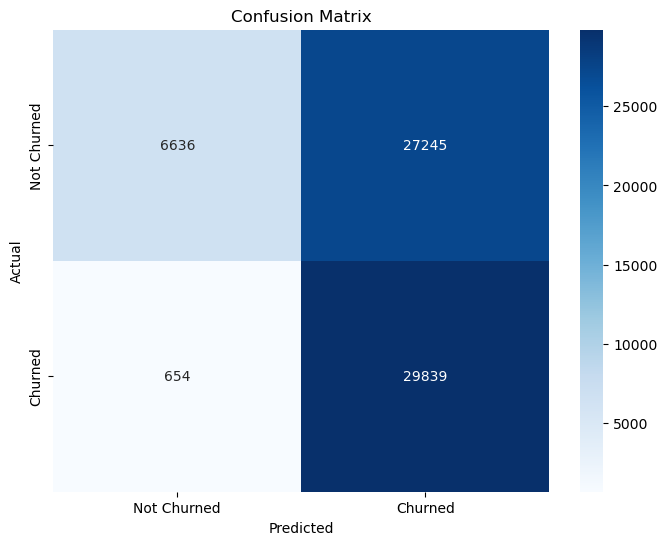

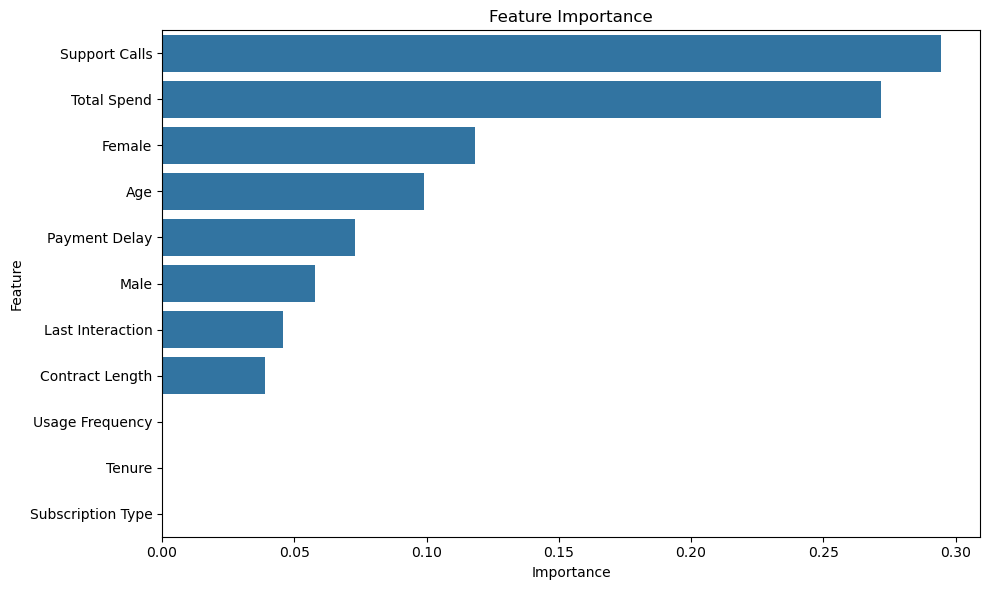


Top 5 Most Important Features:
          Feature  Importance
3   Support Calls    0.294527
7     Total Spend    0.271812
10         Female    0.118389
0             Age    0.099056
4   Payment Delay    0.073091


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report

np.random.seed(42)

# Load training and testing datasets
train_path = 'cleaned_customer_churn_dataset_training.csv'
test_path = 'cleaned_customer_churn_dataset_testing.csv'

train_data = pd.read_csv(train_path)
test_data = pd.read_csv(test_path)

# Separate features and target variable
X_train = train_data.drop(['CustomerID', 'Churn'], axis=1)
y_train = train_data['Churn']

X_test = test_data.drop(['CustomerID', 'Churn'], axis=1)
y_test = test_data['Churn']

# Define improved XGBoost parameters to address overfitting
params = {
    'objective': 'binary:logistic',  # Binary classification
    'max_depth': 3,                  
    'learning_rate': 0.05,           
    'n_estimators': 50,              
    'subsample': 0.7,                
    'colsample_bytree': 0.7,         # column sampling
    'reg_alpha': 0.1,                # L1 regularization 
    'reg_lambda': 1.0,               # L2 regularization 
    'min_child_weight': 3,           
    'eval_metric': 'logloss',        # Evaluation metric
    'random_state': 42               
}

# Create and train the model
model = xgb.XGBClassifier(**params)
model.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=True)

# Make predictions
y_pred_proba = model.predict_proba(X_test)[:, 1]  
y_pred = model.predict(X_test)                    

# Calculate classification metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print the metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

# Generate and display the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Generate the confusion matrix
confusion_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Churned', 'Churned'],
            yticklabels=['Not Churned', 'Churned'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

feature_importance = model.feature_importances_
feature_names = X_train.columns
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance')
plt.tight_layout()
plt.show()

print("\nTop 5 Most Important Features:")
print(importance_df.head(5))